In [36]:
import numpy as np
import pickle       
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [17]:
[sorted_keys, distance_matrix] = pickle.load(open("distance_matrix.pickle", "rb"))
n = len(sorted_keys)

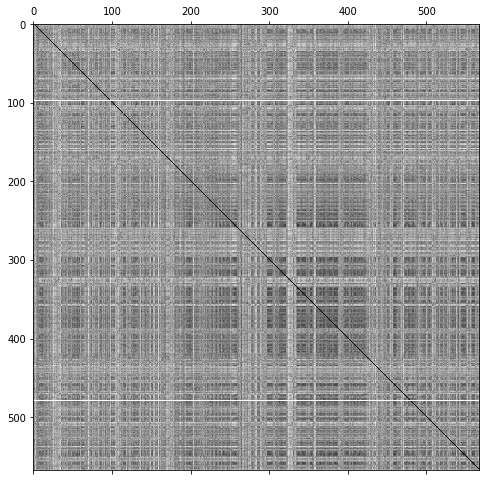

In [18]:
plt.matshow(distance_matrix)

In [19]:
distance_matrix.shape
sorted_keys[0:10]

['aug022016093343',
 'aug022016112948',
 'aug022016115750',
 'aug022016130019',
 'aug022016130517',
 'aug022016133638',
 'aug022016182354',
 'aug042016112117',
 'aug042016120539',
 'aug042016185910']

In [116]:
with open("closest_videos.txt", "wt") as f:
    for i in range(n):
        closest = np.argsort(distance_matrix[i])[1:11]

        print(sorted_keys[i], file = f)
        for j in closest:
            print("\t", sorted_keys[j], "\t", distance_matrix[i, j], file = f)

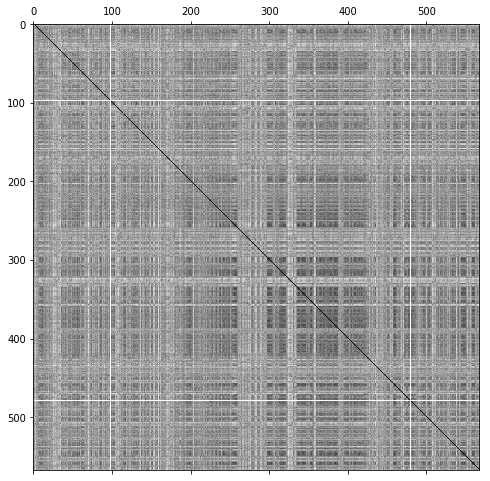

In [117]:
sym = (distance_matrix + np.transpose(distance_matrix)) / 2.0
plt.matshow(sym)

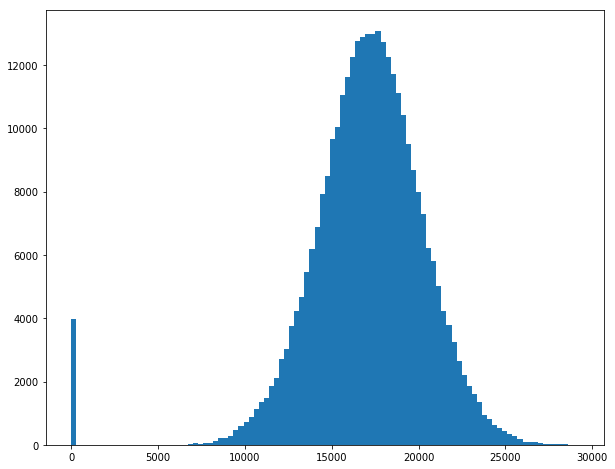

In [118]:
sym[np.isnan(sym)] = -1
plt.hist(sym.reshape(-1), bins = 100)
plt.show()

In [120]:
db = DBSCAN(eps=10000, min_samples=10, metric = "precomputed")
sym[sym == -1] = 1e5
clusters = db.fit_predict(sym)
sk = np.array(sorted_keys)
print(sk[clusters==0])
print(sk[clusters==-1])

['aug042016120539' 'aug042016185910' 'aug062016115725' 'aug202015203808'
 'aug242015181703' 'aug272015191321' 'aug312015202424' 'dec082016102046'
 'dec082016150322' 'dec082016150351' 'dec082016160904' 'dec132016134527'
 'dec242016112152' 'jul122016111950' 'jul122016114238' 'jul122016114303'
 'jul162016185605' 'jul262016180827' 'jul262016180929' 'jul262016181237'
 'jul282016175914' 'jul282016175940' 'jul292016163205' 'jul292016172341'
 'jun042016131017' 'jun302016202338' 'jun302016202411' 'jun302016202442'
 'may102016144330' 'may172016184858' 'may192016110614' 'may192016201918'
 'may212016162413' 'may212016162431' 'may262016162735' 'may262016162800'
 'nov012015151852' 'nov022015111937' 'nov022015115211' 'nov032015101951'
 'nov032015104005' 'nov032015112509' 'nov032015113323' 'nov182015152654'
 'nov182015152730' 'nov182015152819' 'nov182015152854' 'nov182015154613'
 'nov182015154654' 'nov182015154724' 'nov182015183532' 'nov192015120626'
 'nov192015133139' 'nov192015133213' 'nov1920151333